### UNIT 2 LABORATORY ASSIGNEMENT

In [116]:
import numpy as np

import pandas as pd

from scipy.stats import mannwhitneyu, ttest_ind
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
def parse_dat_file(file_path):
    """
    Parse a .dat file into pandas 
    (why not CSVs T___________T)
    """
    with open(file_path,'r') as f:
        df = pd.DataFrame(l.rstrip().split('\t') for l in f)
    columns = df.iloc[0].values
    columns = np.array([str(column).strip('"') for column in columns])
    df.columns = columns
    df = df.drop(df.index[0])
    return df

In [54]:
df = parse_dat_file('data.dat')

**1. Plot histograms of variables ‘Age’ and ‘GMSI_Emotions’**

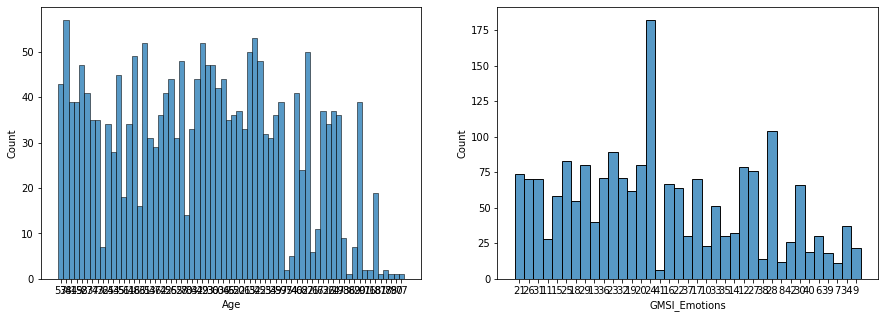

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(
    df['Age'],
    ax=axs[0],
    bins=5
)
sns.histplot(
    df['GMSI_Emotions'],
    ax=axs[1],
    bins=10
)
plt.show()

**2. Create frequency tables for ‘Gender’ , ‘Sexorientation’,  and ‘Occupation’**

In [64]:
df.groupby('Gender')['Gender'].count()

Gender
"f"    1072
"m"     928
Name: Gender, dtype: int64

In [65]:
df.groupby('Sexorientation')['Sexorientation'].count()

Sexorientation
"Bisexual"                79
"Gay"                     47
"I'd rather not say"      33
"Straight"              1835
"Transgender"              6
Name: Sexorientation, dtype: int64

In [68]:
df.groupby('Occupation')['Occupation'].count()

Occupation
"Accountancy"                               54
"Agriculture, Fishing, Forestry"             8
"Banking, Insurance, Finance"               75
"Catering & Hospitality"                    27
"Charities"                                 21
"Computers, Software"                       29
"Construction / Property Development"       44
"Customer Services, Call Centres"           55
"Education"                                120
"Education, Training & Library"             37
"Electronics"                               16
"Engineering, Manufacturing, Utilities"     75
"Graduate, Trainees"                         6
"Health, Nursing, Social Services"         118
"Housewife, Homemaker"                     193
"Human Resources"                           18
"IT & Internet"                             69
"Information Technology"                    23
"Legal"                                     23
"Marketing, Advertising, PR"                16
"Media, Creative"                           28
"O

**3. Create boxplot for different sources of arousal (variables starting ‘Hzsex_’)**

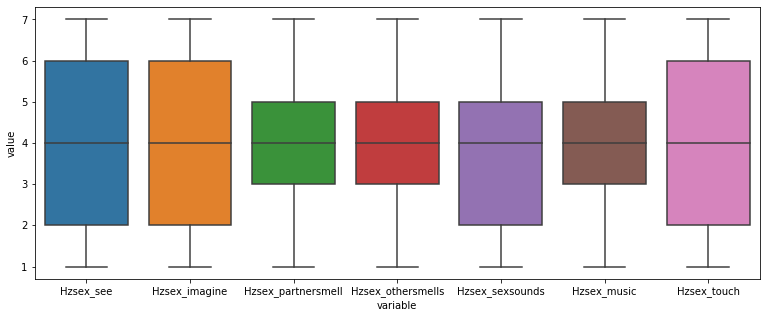

In [80]:
slice_df = df[
        [
        'Hzsex_see',
        'Hzsex_imagine',
        'Hzsex_partnersmell',
        'Hzsex_othersmells',
        'Hzsex_sexsounds',
        'Hzsex_music',
        'Hzsex_touch'
    ]
]
slice_df = pd.melt(slice_df)
slice_df['value'] = slice_df['value'].astype(int)
plt.figure(figsize=(13, 5))
sns.boxplot(
    x='variable',
    y='value',
    data=slice_df
)
plt.show()

**4. Create boxplot for importance of partner’s musical taste (“musicdateprefers’) for males and females.**

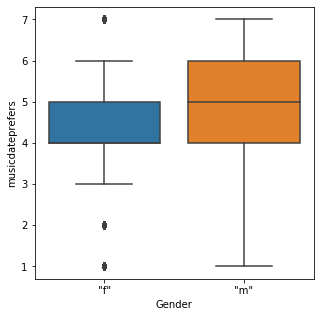

In [81]:
plt.figure(figsize=(5, 5))
sns.boxplot(
    x=df['Gender'],
    y=df['musicdateprefers'].astype(int),
)
plt.show()

**5. Create boxplot for difference in Stomp scores between normal taste and music for a romantic diner (‘Stomp.distance’)**

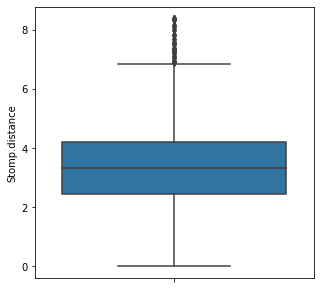

In [85]:
plt.figure(figsize=(5, 5))
sns.boxplot(
    y=df['Stomp.distance'].astype(float),
)
plt.show()

**6. Create a scattergram of Age vs preference for Reflective&Complex music (‘Sgenre1’) using plot( , )**

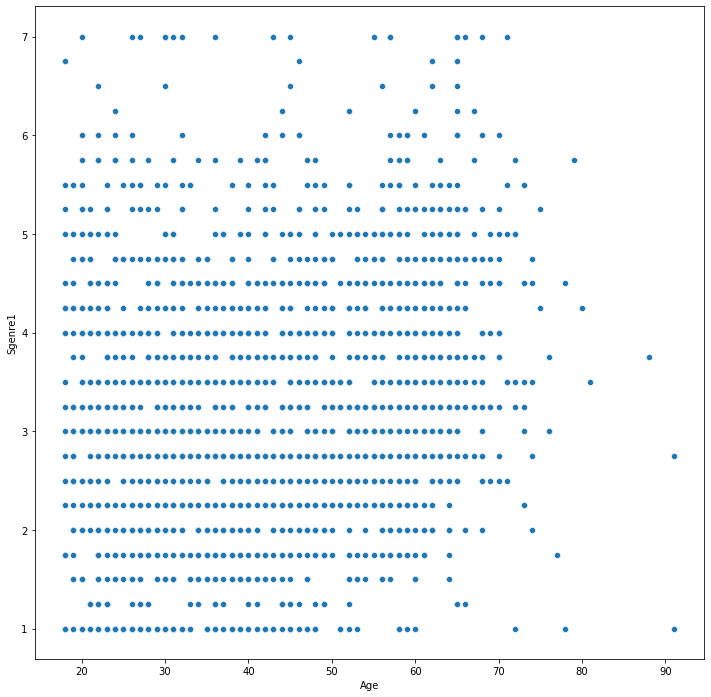

In [92]:
plt.figure(figsize=(12, 12))
sns.scatterplot(
   x= df['Age'].astype(int),
    y=df['Sgenre1'].astype(float)
)
plt.show()

**6. Create a grid of scatterplots for Age vs Sgenre1 for all sexual orientations**

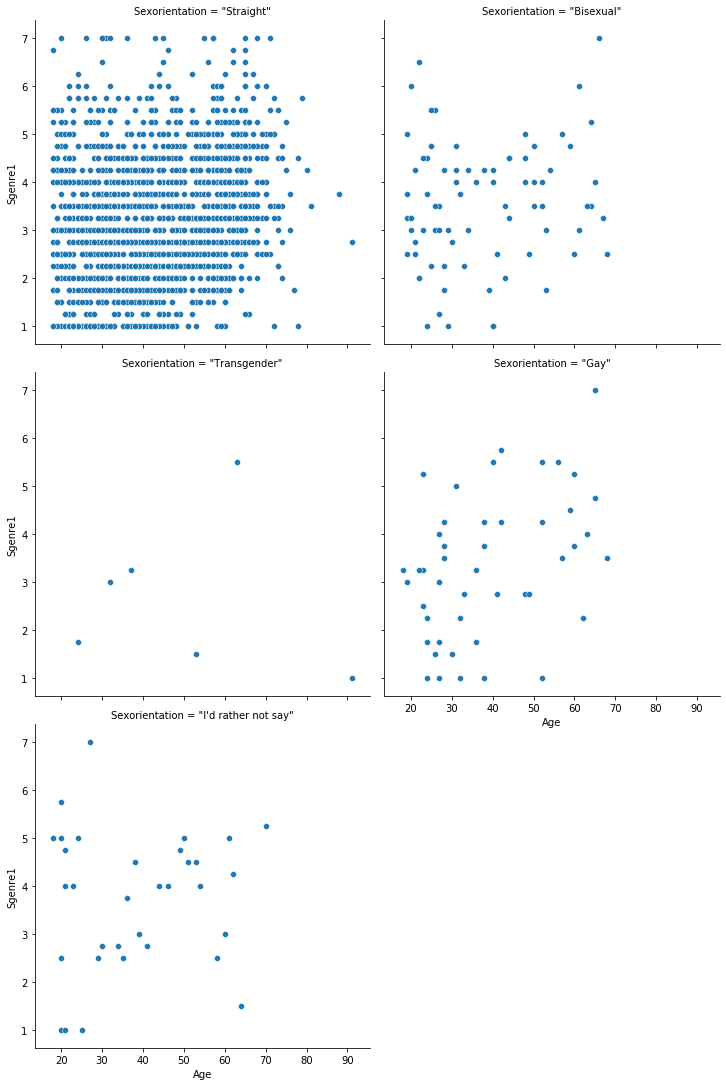

In [95]:
sns.relplot(
    x= df['Age'].astype(int),
    y=df['Sgenre1'].astype(float),
    col=df['Sexorientation'],
    col_wrap=2
)
plt.show()

**7. Create a grid of scatterplots for Stomp.distance vs GMSI_Emotions for bother Genders using**

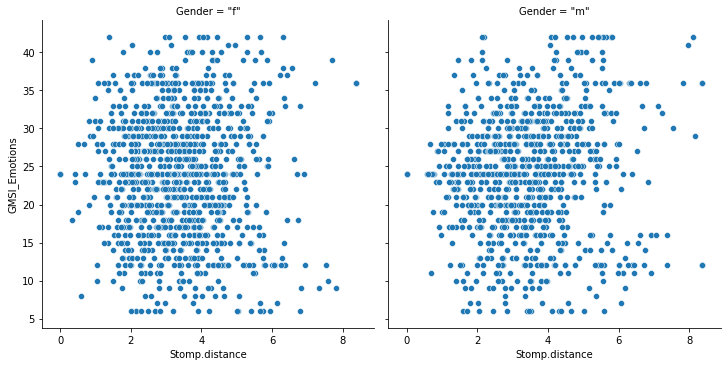

In [97]:
sns.relplot(
    x= df['Stomp.distance'].astype(float),
    y=df['GMSI_Emotions'].astype(float),
    col=df['Gender'],
    col_wrap=2
)
plt.show()

**8. Test and predict which people use music for romantic dinners that differs from their normal taste (‘Stomp.distance’ as dependent variable)**

**8.a. Test for gender differences on using ttest and wilcoxon test**

In [113]:
t, p = ttest_ind(
    df[df['Gender'] == '"f"']['Stomp.distance'].values.astype(float),
    df[df['Gender'] == '"m"']['Stomp.distance'].values.astype(float),
)
print(
    f"""
    p: {p}
    t: {t}
    """
)


    p: 0.4948892922078951
    t: -0.6826782914470026
    


In [117]:
w, p = mannwhitneyu(
    df[df['Gender'] == '"f"']['Stomp.distance'].values.astype(float),
    df[df['Gender'] == '"m"']['Stomp.distance'].values.astype(float),
)
print(
    f"""
    p: {p}
    w: {w}
    """
)


    p: 0.28962534133828893
    w: 490266.0
    


**8.b. Use linear model with lm() and include all sensible predictor variables; look at summary() of your model; look at significant of predictors variables (not variable levels) using anova(my.model)**

In [122]:
slice_df = df[['Stomp.distance', 'Age', 'Gender', 'Sexorientation']]
slice_df['Stomp_distance'] = slice_df['Stomp.distance'].astype(float)
slice_df['Age'] = slice_df['Age'].astype(int)

slice_df['Age'] = (slice_df['Age'] -  slice_df['Age'].mean()) / slice_df['Age'].std()
mod = smf.ols(formula='Stomp_distance ~ Age + C(Gender) + C(Sexorientation)', data=slice_df)
resid = mod.fit()
resid.summary()

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\envs\workshop_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\valeriob\AppData\Local\Continuum\anaconda3\envs\workshop_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\valeriob\AppData\Local\Continuum\anaconda3\envs\workshop_env\lib\site-packages\ipykernel_launcher.py:5: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stomp_distance   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.772
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.101
Time:                        14:39:11   Log-Likelihood:                -3508.3
No. Observations:                2000   AIC:                             7031.
Df Residuals:                    1993   BIC:                             7070.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     3.2276      0.161     20.010      0.000       2.911       3.544
C(Gender)[T."m"]                              0.0468      0.063      0.742      0.458      -0.077       0.170
C(Sexorientation)[T."Gay"]                    0.3587      0.258      1.389      0.165      -0.148       0.865
C(Sexorientation)[T."I'd rather not say"]    -0.1050      0.290     -0.362      0.718      -0.674       0.464
C(Sexorientation)[T."Straight"]               0.1493      0.161      0.925      0.355      -0.167       0.466
C(Sexorientation)[T."Transgender"]            0.2420      0.594      0.408      0.684      -0.923       1.407
Age                                          -0.0859      0.032     -2.727      0.006      -0.148      -0.024
==============================================================================
Omnibus:                       84.205   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.973
Skew:                           0.462   Prob(JB):                     1.19e-22
Kurtosis:                       3.597   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**9. Define your own mean function**

In [123]:
def my_mean(x, remove_na=True):
    """
    NanN aware mean function
    """
    x = np.array(x)
    if remove_na:
        x = np.array([element for element in x if element is not None])
    mean = x.sum() / len(x)
    return mean

In [124]:
my_mean([i for i in range(10)])

4.5

In [125]:
my_mean((1,1,1,2,1,3,4,1,5,6))

2.5

In [126]:
my_mean((1,1,1,2,1,3,4,1,5,None))

2.111111111111111

**10. Define your own variance function**

In [148]:
def my_variance(x, remove_na=True):
    """
    NaN aware variance function
    """
    x = np.array(x)
    if remove_na:
        x = np.array([element for element in x if element is not None])
    mean = my_mean(x)
    first_term = np.sum((x-mean)**2)
    second_term = len(x) - 1
    variance = first_term / second_term
    return variance

In [150]:
my_variance((1,1,1,2,1,3,4,1,None,6))

3.1944444444444446

**11. Write a function my.mode for identifying the mode in the frequency distribution from a numerical vector. Extend the function to deal with distributions that have more than 1 mode.**

In [151]:
def my_mode(x, remove_na=True):
    """
    NaN aware mode function
    """  
    x = np.array(x)
    if remove_na:
        x = np.array([element for element in x if element is not None])
    
    unique, counts = np.unique(x, return_counts=True)
    max_indices = np.argwhere(counts == counts.max()).flatten()
    mode = unique[max_indices]
    return mode

In [153]:
my_mode([1,1,2,2,3, None])

array([1, 2])

**14. Write a function my.median. Once you have the basic function working, take care of special cases, e.g. input vector contains NAs, input vector is very short or empty, input vector doesn’t contain numeric data**

In [181]:
def my_median(x, remove_na=True):
    """
    NaN aware median function
    """
    x = np.array(x)
    if remove_na:
        x = np.array([float(element) for element in x if element is not None])
    x = np.sort(x)
    
    try:
        assert all(isinstance(element, (int, float)) for element in x)
    except AssertionError:
        print('Input must be numeric')
        return None
    try: 
        assert len(x) > 0
    except AssertionError:
        print('Input has len 0')
        return None
        
    if len(x) == 1:
        print('Warning, input has len 1')
        return x[0]
    else:
        if len(x) % 2 == 0:
            index = len(x) // 2
            median = x[index]
        else:
            index = (len(x) - 1) // 2
            median = x[index]
        return median

In [182]:
my_median([100, 1000, 100000, 10,1,2,1,None,2,3])

3.0

**13. Write a function containing a loop that takes a numeric vector as input and returns a vector with the square root of each element as a result**

In [154]:
def my_square_root(x, remove_na=True):
    """
    NaN aware square root function
    """
    x = np.array(x)
    if remove_na:
        x = np.array([element for element in x if element is not None])
    squared = np.array([element**0.5 for element in x])
    return squared

In [155]:
my_square_root([x for x in range(10)])

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])